###  1 - Importación del dataset

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [135]:
df = pd.read_csv('/content/houses_Madrid.csv')
df.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [136]:
df.shape

(21742, 58)

In [137]:
df.duplicated().sum()

0

In [138]:
df.dtypes

Unnamed: 0                        int64
id                                int64
title                            object
subtitle                         object
sq_mt_built                     float64
sq_mt_useful                    float64
n_rooms                           int64
n_bathrooms                     float64
n_floors                        float64
sq_mt_allotment                 float64
latitude                        float64
longitude                       float64
raw_address                      object
is_exact_address_hidden            bool
street_name                      object
street_number                    object
portal                          float64
floor                            object
is_floor_under                   object
door                            float64
neighborhood_id                  object
operation                        object
rent_price                        int64
rent_price_by_area              float64
is_rent_price_known                bool


In [139]:
columns_object = list(df.dtypes[df.dtypes == 'object'].index)

In [140]:
for col in columns_object:
    df[col] = df[col].astype('category')

In [141]:
df.dtypes

Unnamed: 0                         int64
id                                 int64
title                           category
subtitle                        category
sq_mt_built                      float64
sq_mt_useful                     float64
n_rooms                            int64
n_bathrooms                      float64
n_floors                         float64
sq_mt_allotment                  float64
latitude                         float64
longitude                        float64
raw_address                     category
is_exact_address_hidden             bool
street_name                     category
street_number                   category
portal                           float64
floor                           category
is_floor_under                  category
door                             float64
neighborhood_id                 category
operation                       category
rent_price                         int64
rent_price_by_area               float64
is_rent_price_kn

In [142]:
df.nunique()

Unnamed: 0                      21742
id                              21742
title                           10736
subtitle                          146
sq_mt_built                       678
sq_mt_useful                      408
n_rooms                            19
n_bathrooms                        16
n_floors                            6
sq_mt_allotment                   356
latitude                            0
longitude                           0
raw_address                      9666
is_exact_address_hidden             2
street_name                      6177
street_number                     420
portal                              0
floor                              19
is_floor_under                      2
door                                0
neighborhood_id                   126
operation                           1
rent_price                       1671
rent_price_by_area                  0
is_rent_price_known                 1
buy_price                        2403
buy_price_by

In [143]:
df_cleaned = df.drop(['is_new_development','is_floor_under','sq_mt_useful','n_floors','is_buy_price_known','buy_price_by_area','operation','title','rent_price_by_area','is_rent_price_known','energy_certificate','built_year','street_name','street_number','sq_mt_allotment','portal','door','is_renewal_needed','has_central_heating','has_individual_heating','Unnamed: 0','is_exact_address_hidden','longitude','latitude','has_balcony','has_terrace','has_pool','has_garden','are_pets_allowed','has_ac','has_fitted_wardrobes','has_storage_room','is_furnished','is_kitchen_equipped','is_accessible','has_green_zones','has_parking','has_private_parking','has_public_parking','is_parking_included_in_price','parking_price','is_orientation_north','is_orientation_west','is_orientation_south','is_orientation_east'] , axis=1)
df_cleaned_2 = df.drop(['is_new_development','is_floor_under','sq_mt_useful','n_floors','is_buy_price_known','buy_price_by_area','operation','title','rent_price_by_area','is_rent_price_known','energy_certificate','street_name','street_number','sq_mt_allotment','portal','door','is_renewal_needed','has_central_heating','has_individual_heating','Unnamed: 0','is_exact_address_hidden','longitude','latitude','has_terrace','has_garden','are_pets_allowed','has_ac','has_fitted_wardrobes','has_storage_room','is_furnished','is_kitchen_equipped','is_accessible','has_green_zones','has_parking','has_public_parking','is_parking_included_in_price','parking_price','is_orientation_north','is_orientation_west','is_orientation_east'] , axis=1)

In [144]:
df_cleaned.nunique()

id                 21742
subtitle             146
sq_mt_built          678
n_rooms               19
n_bathrooms           16
raw_address         9666
floor                 19
neighborhood_id      126
rent_price          1671
buy_price           2403
house_type_id          4
has_lift               2
is_exterior            2
dtype: int64

In [145]:
df_cleaned_2.head()

,id,subtitle,sq_mt_built,n_rooms,n_bathrooms,raw_address,floor,neighborhood_id,rent_price,buy_price,house_type_id,built_year,has_lift,is_exterior,has_pool,has_balcony,has_private_parking,is_orientation_south
0,21742,"San Cristóbal, Madrid",64.0,2,1.0,"Calle de Godella, 64",3,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,471,85000,HouseType 1: Pisos,1960.0,False,True,NaN,NaN,NaN,False
1,21741,"Los Ángeles, Madrid",70.0,3,1.0,Calle de la del Manojo de Rosas,4,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,666,129900,HouseType 1: Pisos,NaN,True,True,NaN,NaN,NaN,NaN
2,21740,"San Andrés, Madrid",94.0,2,2.0,"Calle del Talco, 68",1,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,722,144247,HouseType 1: Pisos,NaN,True,True,NaN,NaN,NaN,NaN
3,21739,"San Andrés, Madrid",64.0,2,1.0,Calle Pedro Jiménez,Bajo,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,583,109900,HouseType 1: Pisos,1955.0,True,True,NaN,NaN,NaN,True
4,21738,"Los Rosales, Madrid",108.0,2,2.0,Carretera de Villaverde a Vallecas,4,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,1094,260000,HouseType 1: Pisos,2003.0,True,True,True,NaN,NaN,True


In [146]:
df_cleaned_2 = df_cleaned_2.dropna()

In [147]:
df_cleaned_2.shape

(0, 18)

In [148]:
df_cleaned.house_type_id.unique()

['HouseType 1: Pisos', 'HouseType 4: Dúplex', NaN, 'HouseType 5: Áticos', 'HouseType 2: Casa o chalet']
Categories (4, object): ['HouseType 1: Pisos', 'HouseType 2: Casa o chalet', 'HouseType 4: Dúplex',
                         'HouseType 5: Áticos']

In [149]:
df_cleaned['house_type_id'] = df_cleaned['house_type_id'].str.replace('HouseType 1: ', '')
df_cleaned['house_type_id'] = df_cleaned['house_type_id'].str.replace('HouseType 2: ', '')
df_cleaned['house_type_id'] = df_cleaned['house_type_id'].str.replace('HouseType 4: ', '')
df_cleaned['house_type_id'] = df_cleaned['house_type_id'].str.replace('HouseType 5: ', '')

In [150]:
df_cleaned['neighborhood_id'] = df['neighborhood_id'].str.replace('Neighborhood', '')

In [151]:
df_cleaned.head()

,id,subtitle,sq_mt_built,n_rooms,n_bathrooms,raw_address,floor,neighborhood_id,rent_price,buy_price,house_type_id,has_lift,is_exterior
0,21742,"San Cristóbal, Madrid",64.0,2,1.0,"Calle de Godella, 64",3,135: San Cristóbal (1308.89 €/m2) - District ...,471,85000,Pisos,False,True
1,21741,"Los Ángeles, Madrid",70.0,3,1.0,Calle de la del Manojo de Rosas,4,132: Los Ángeles (1796.68 €/m2) - District 21...,666,129900,Pisos,True,True
2,21740,"San Andrés, Madrid",94.0,2,2.0,"Calle del Talco, 68",1,134: San Andrés (1617.18 €/m2) - District 21:...,722,144247,Pisos,True,True
3,21739,"San Andrés, Madrid",64.0,2,1.0,Calle Pedro Jiménez,Bajo,134: San Andrés (1617.18 €/m2) - District 21:...,583,109900,Pisos,True,True
4,21738,"Los Rosales, Madrid",108.0,2,2.0,Carretera de Villaverde a Vallecas,4,133: Los Rosales (1827.79 €/m2) - District 21...,1094,260000,Pisos,True,True


In [152]:
df_cleaned.shape

(21742, 13)

In [153]:
df_cleaned = df_cleaned.dropna()

In [154]:
df_cleaned.shape

(13629, 13)

In [155]:
df_cleaned.head()

,id,subtitle,sq_mt_built,n_rooms,n_bathrooms,raw_address,floor,neighborhood_id,rent_price,buy_price,house_type_id,has_lift,is_exterior
0,21742,"San Cristóbal, Madrid",64.0,2,1.0,"Calle de Godella, 64",3,135: San Cristóbal (1308.89 €/m2) - District ...,471,85000,Pisos,False,True
1,21741,"Los Ángeles, Madrid",70.0,3,1.0,Calle de la del Manojo de Rosas,4,132: Los Ángeles (1796.68 €/m2) - District 21...,666,129900,Pisos,True,True
2,21740,"San Andrés, Madrid",94.0,2,2.0,"Calle del Talco, 68",1,134: San Andrés (1617.18 €/m2) - District 21:...,722,144247,Pisos,True,True
3,21739,"San Andrés, Madrid",64.0,2,1.0,Calle Pedro Jiménez,Bajo,134: San Andrés (1617.18 €/m2) - District 21:...,583,109900,Pisos,True,True
4,21738,"Los Rosales, Madrid",108.0,2,2.0,Carretera de Villaverde a Vallecas,4,133: Los Rosales (1827.79 €/m2) - District 21...,1094,260000,Pisos,True,True


In [156]:
df_cleaned.describe()

,id,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price
count,13629.000000,13629.000000,13629.000000,13629.000000,1.362900e+04,1.362900e+04
mean,11005.634016,112.874165,2.772764,1.753027,-1.112902e+04,4.801545e+05
std,6402.087102,73.084753,1.162698,0.927781,3.323571e+05,5.126718e+05
min,4.000000,16.000000,0.000000,1.000000,-3.459028e+07,4.200000e+04
25%,5342.000000,69.000000,2.000000,1.000000,7.980000e+02,1.890000e+05
50%,10777.000000,92.000000,3.000000,2.000000,1.148000e+03,3.170000e+05
75%,16772.000000,132.000000,3.000000,2.000000,1.644000e+03,5.704470e+05
max,21742.000000,894.000000,15.000000,9.000000,2.517000e+03,8.800000e+06


In [157]:
# Especifica los valores mínimo y máximo para el rango deseado
valor_minimo = 0
valor_maximo = 30

# Filtra las filas que están dentro del rango especificado y guarda el resultado
resultado_filtrado = df_cleaned[(df_cleaned['rent_price'] >= valor_minimo)]
# resultado_filtrado = data[(data['columna1'] >= valor_minimo) & (data['columna1'] <= valor_maximo)]

# Si deseas eliminar las filas fuera del rango y mantener solo las que están dentro,
# puedes sobrescribir el DataFrame original de la siguiente manera:
data = resultado_filtrado

# Si deseas resetear los índices del DataFrame resultante
data.reset_index(drop=True, inplace=True)

In [158]:
data.shape

(12896, 13)

In [159]:
data.describe()

,id,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price
count,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,1.289600e+04
mean,11200.168734,101.411290,2.679978,1.632212,1303.763570,3.845153e+05
std,6413.833524,49.979574,1.070028,0.752227,549.908852,2.623156e+05
min,4.000000,16.000000,0.000000,1.000000,18.000000,4.200000e+04
25%,5467.250000,67.000000,2.000000,1.000000,851.000000,1.800000e+05
50%,11228.500000,89.000000,3.000000,2.000000,1187.000000,2.986500e+05
75%,16941.250000,122.000000,3.000000,2.000000,1683.500000,5.200000e+05
max,21742.000000,500.000000,14.000000,9.000000,2517.000000,1.380000e+06


In [160]:
data[data['rent_price'] == 18]

,id,subtitle,sq_mt_built,n_rooms,n_bathrooms,raw_address,floor,neighborhood_id,rent_price,buy_price,house_type_id,has_lift,is_exterior
11289,2960,"Chueca-Justicia, Madrid",203.0,2,2.0,argensola,2,20: Chueca-Justicia (6029.36 €/m2) - District...,18,1380000,Pisos,True,True


In [161]:
data.rent_price.min()

18

In [162]:
data[data['rent_price'] == 35]

,id,subtitle,sq_mt_built,n_rooms,n_bathrooms,raw_address,floor,neighborhood_id,rent_price,buy_price,house_type_id,has_lift,is_exterior
11385,2756,"Chueca-Justicia, Madrid",160.0,2,2.0,MEJIA LEQUERICA,4,20: Chueca-Justicia (6029.36 €/m2) - District...,35,1378900,Áticos,True,True


In [163]:
data.drop(11385, axis=0, inplace=True)

<ipython-input-163-f3e4b5cf8d88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(11385, axis=0, inplace=True)


In [164]:
data.rent_price.min()

18

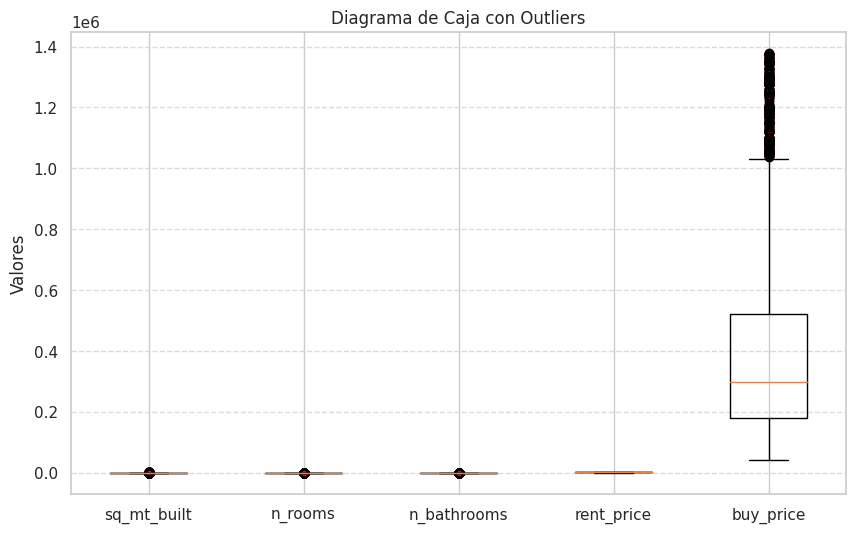

In [165]:
import pandas as pd
import matplotlib.pyplot as plt



# Variables que deseas visualizar en el diagrama de caja (ajusta esto a tus datos)
variables_a_visualizar = ["sq_mt_built",	"n_rooms","n_bathrooms","rent_price",	"buy_price"]

# Crea un subconjunto de datos solo con las variables que deseas visualizar
data_subset = data[variables_a_visualizar]

# Crea el diagrama de caja
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(data_subset.values, labels=variables_a_visualizar, whis=1.5)

# Identifica y muestra los outliers como puntos
outliers = [flier.get_ydata() for flier in boxplot['fliers']]
for i, outlier in enumerate(outliers):
    plt.scatter([i + 1] * len(outlier), outlier, c='red', marker='o', alpha=0.5)

plt.title('Diagrama de Caja con Outliers')
plt.ylabel('Valores')
plt.xticks(range(1, len(variables_a_visualizar) + 1), variables_a_visualizar)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


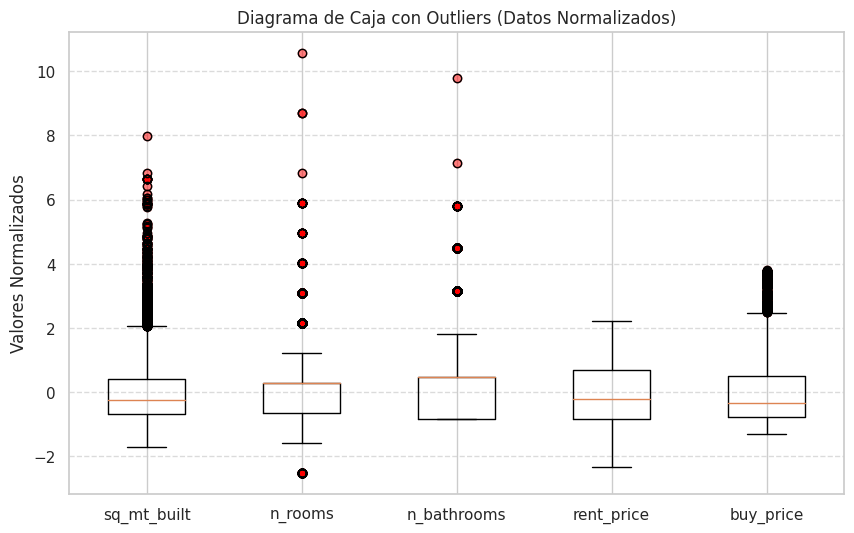

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Variables que deseas visualizar en el diagrama de caja (ajusta esto a tus datos)
variables_a_visualizar = ["sq_mt_built", "n_rooms", "n_bathrooms", "rent_price", "buy_price"]

# Crea un subconjunto de datos solo con las variables que deseas visualizar
data_subset = data[variables_a_visualizar]

# Normaliza los datos usando la normalización estándar (z-score)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_subset)

# Crea el diagrama de caja
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(normalized_data, labels=variables_a_visualizar, whis=1.5)

# Identifica y muestra los outliers como puntos
outliers = [flier.get_ydata() for flier in boxplot['fliers']]
for i, outlier in enumerate(outliers):
    plt.scatter([i + 1] * len(outlier), outlier, c='red', marker='o', alpha=0.5)

plt.title('Diagrama de Caja con Outliers (Datos Normalizados)')
plt.ylabel('Valores Normalizados')
plt.xticks(range(1, len(variables_a_visualizar) + 1), variables_a_visualizar)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [167]:
# Especifica los valores mínimo y máximo para el rango deseado
valor_minimo = 500
valor_maximo = 30

# Filtra las filas que están dentro del rango especificado y guarda el resultado
resultado_filtrado = df_cleaned[(df_cleaned['rent_price'] >= valor_minimo)]
# resultado_filtrado = data[(data['columna1'] >= valor_minimo) & (data['columna1'] <= valor_maximo)]

# Si deseas eliminar las filas fuera del rango y mantener solo las que están dentro,
# puedes sobrescribir el DataFrame original de la siguiente manera:
data = resultado_filtrado

# Si deseas resetear los índices del DataFrame resultante
data.reset_index(drop=True, inplace=True)

In [168]:
data.shape

(12708, 13)

In [169]:
data.describe()

,id,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price
count,12708.000000,12708.000000,12708.000000,12708.000000,12708.000000,1.270800e+04
mean,11146.932326,101.411237,2.682247,1.633381,1316.911394,3.849896e+05
std,6403.749781,48.879528,1.061385,0.744800,542.998344,2.564107e+05
min,4.000000,16.000000,0.000000,1.000000,501.000000,9.150000e+04
25%,5444.750000,68.000000,2.000000,1.000000,868.000000,1.850000e+05
50%,11179.500000,90.000000,3.000000,2.000000,1195.000000,2.990000e+05
75%,16915.250000,122.000000,3.000000,2.000000,1701.000000,5.203040e+05
max,21741.000000,500.000000,14.000000,9.000000,2517.000000,1.343500e+06


In [170]:
data.corr()

<ipython-input-170-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price
id,1.000000,-0.053397,0.004455,-0.055061,-0.249745,-0.236443
sq_mt_built,-0.053397,1.000000,0.681326,0.757407,0.707866,0.783102
n_rooms,0.004455,0.681326,1.000000,0.573869,0.420837,0.454476
n_bathrooms,-0.055061,0.757407,0.573869,1.000000,0.654431,0.698685
rent_price,-0.249745,0.707866,0.420837,0.654431,1.000000,0.907314
buy_price,-0.236443,0.783102,0.454476,0.698685,0.907314,1.000000


<ipython-input-171-bc86285a7719>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = data.corr()


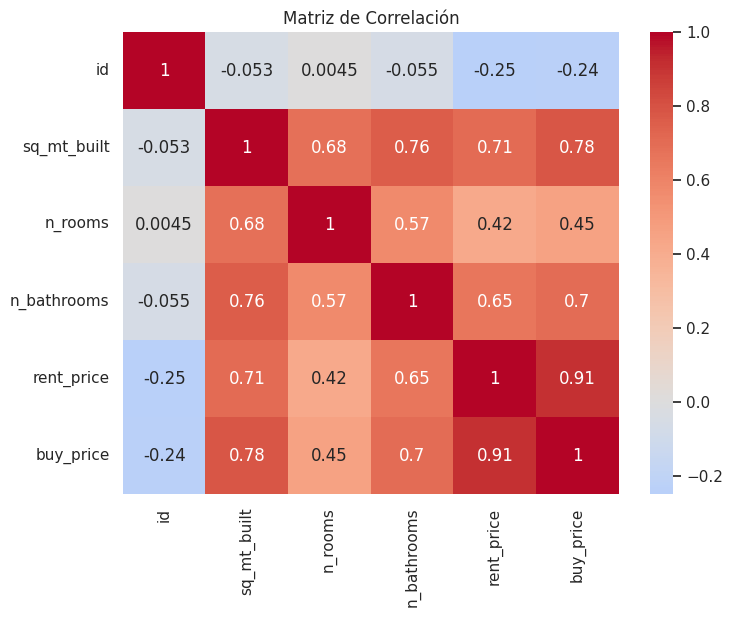

In [171]:
matriz_correlacion = data.corr()

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación")
plt.show()

In [172]:
data.describe().round()

,id,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price
count,12708.0,12708.0,12708.0,12708.0,12708.0,12708.0
mean,11147.0,101.0,3.0,2.0,1317.0,384990.0
std,6404.0,49.0,1.0,1.0,543.0,256411.0
min,4.0,16.0,0.0,1.0,501.0,91500.0
25%,5445.0,68.0,2.0,1.0,868.0,185000.0
50%,11180.0,90.0,3.0,2.0,1195.0,299000.0
75%,16915.0,122.0,3.0,2.0,1701.0,520304.0
max,21741.0,500.0,14.0,9.0,2517.0,1343500.0


In [173]:
data[data['n_rooms'] == 14]

,id,subtitle,sq_mt_built,n_rooms,n_bathrooms,raw_address,floor,neighborhood_id,rent_price,buy_price,house_type_id,has_lift,is_exterior
10903,3285,"Sol, Madrid",207.0,14,4.0,Calle de la Montera,3,25: Sol (5390.99 €/m2) - District 4: Centro,1536,1250000,Pisos,False,True


In [174]:
data['distrito'] = data['neighborhood_id']

<ipython-input-174-4fe2d5d37f62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distrito'] = data['neighborhood_id']


In [175]:
data.head()

,id,subtitle,sq_mt_built,n_rooms,n_bathrooms,raw_address,floor,neighborhood_id,rent_price,buy_price,house_type_id,has_lift,is_exterior,distrito
0,21741,"Los Ángeles, Madrid",70.0,3,1.0,Calle de la del Manojo de Rosas,4,132: Los Ángeles (1796.68 €/m2) - District 21...,666,129900,Pisos,True,True,132: Los Ángeles (1796.68 €/m2) - District 21...
1,21740,"San Andrés, Madrid",94.0,2,2.0,"Calle del Talco, 68",1,134: San Andrés (1617.18 €/m2) - District 21:...,722,144247,Pisos,True,True,134: San Andrés (1617.18 €/m2) - District 21:...
2,21739,"San Andrés, Madrid",64.0,2,1.0,Calle Pedro Jiménez,Bajo,134: San Andrés (1617.18 €/m2) - District 21:...,583,109900,Pisos,True,True,134: San Andrés (1617.18 €/m2) - District 21:...
3,21738,"Los Rosales, Madrid",108.0,2,2.0,Carretera de Villaverde a Vallecas,4,133: Los Rosales (1827.79 €/m2) - District 21...,1094,260000,Pisos,True,True,133: Los Rosales (1827.79 €/m2) - District 21...
4,21737,"San Andrés, Madrid",126.0,4,2.0,geologia,3,134: San Andrés (1617.18 €/m2) - District 21:...,901,195000,Pisos,False,True,134: San Andrés (1617.18 €/m2) - District 21:...


In [176]:
data['distrito'] = data['distrito'].str.extract(r'District (\d+)')
data['neighborhood_id'] = data['neighborhood_id'].str.extract(r'(\d+)')

<ipython-input-176-e4777c796699>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distrito'] = data['distrito'].str.extract(r'District (\d+)')
<ipython-input-176-e4777c796699>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighborhood_id'] = data['neighborhood_id'].str.extract(r'(\d+)')


In [177]:
data.head()

,id,subtitle,sq_mt_built,n_rooms,n_bathrooms,raw_address,floor,neighborhood_id,rent_price,buy_price,house_type_id,has_lift,is_exterior,distrito
0,21741,"Los Ángeles, Madrid",70.0,3,1.0,Calle de la del Manojo de Rosas,4,132,666,129900,Pisos,True,True,21
1,21740,"San Andrés, Madrid",94.0,2,2.0,"Calle del Talco, 68",1,134,722,144247,Pisos,True,True,21
2,21739,"San Andrés, Madrid",64.0,2,1.0,Calle Pedro Jiménez,Bajo,134,583,109900,Pisos,True,True,21
3,21738,"Los Rosales, Madrid",108.0,2,2.0,Carretera de Villaverde a Vallecas,4,133,1094,260000,Pisos,True,True,21
4,21737,"San Andrés, Madrid",126.0,4,2.0,geologia,3,134,901,195000,Pisos,False,True,21


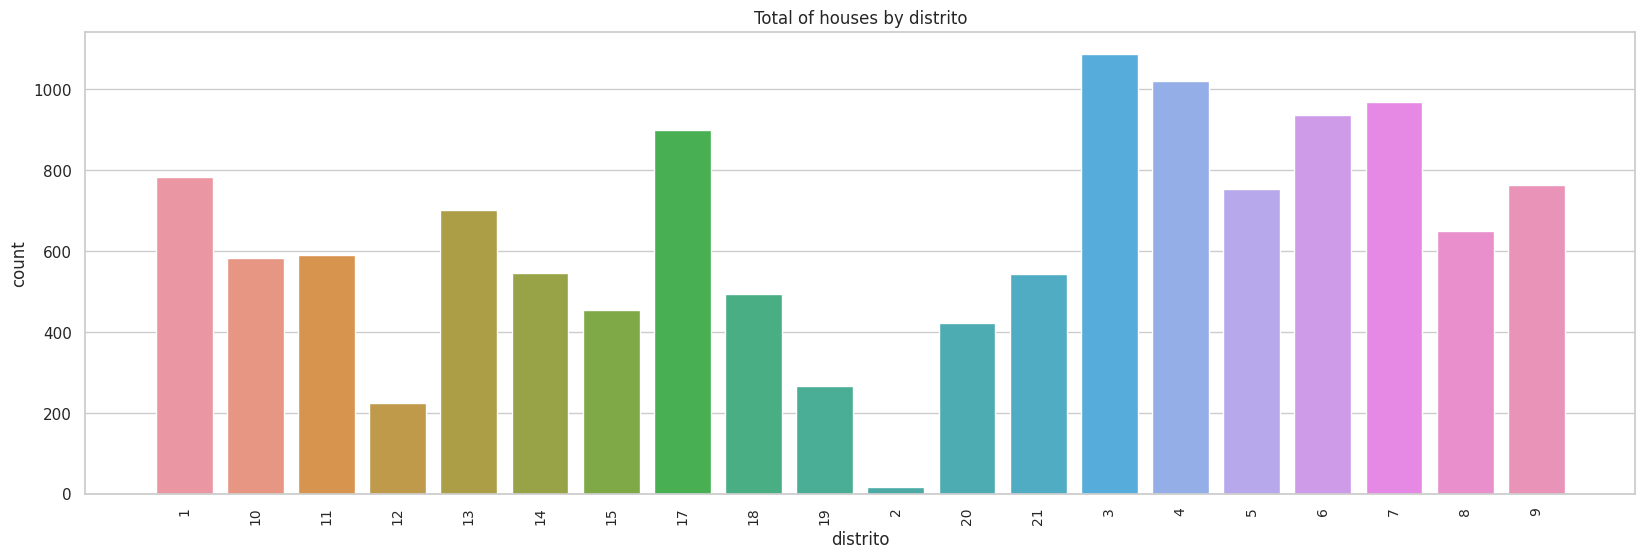

In [178]:
for idx in ["distrito"]:
    df_plot = data.copy()
    df_plot = df_plot.sort_values(by="distrito")
    df_plot = (data.groupby(idx)[idx].count()
                                    .to_frame()
                                    .rename(columns={idx: "count"})
                                    .reset_index())
    plt.figure(figsize=(20, 6))
    sns.barplot(x=df_plot[idx], y=df_plot["count"])
    plt.title(f"Total of houses by {idx}")
    plt.tick_params(axis='x', labelsize="small", labelrotation=90)
    plt.locator_params(axis='x', nbins=126)
    plt.show()

In [179]:
nuevo_nombre = "barrio"
data.rename(columns={"subtitle": nuevo_nombre}, inplace=True)

<ipython-input-179-9d37bc49e1fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"subtitle": nuevo_nombre}, inplace=True)


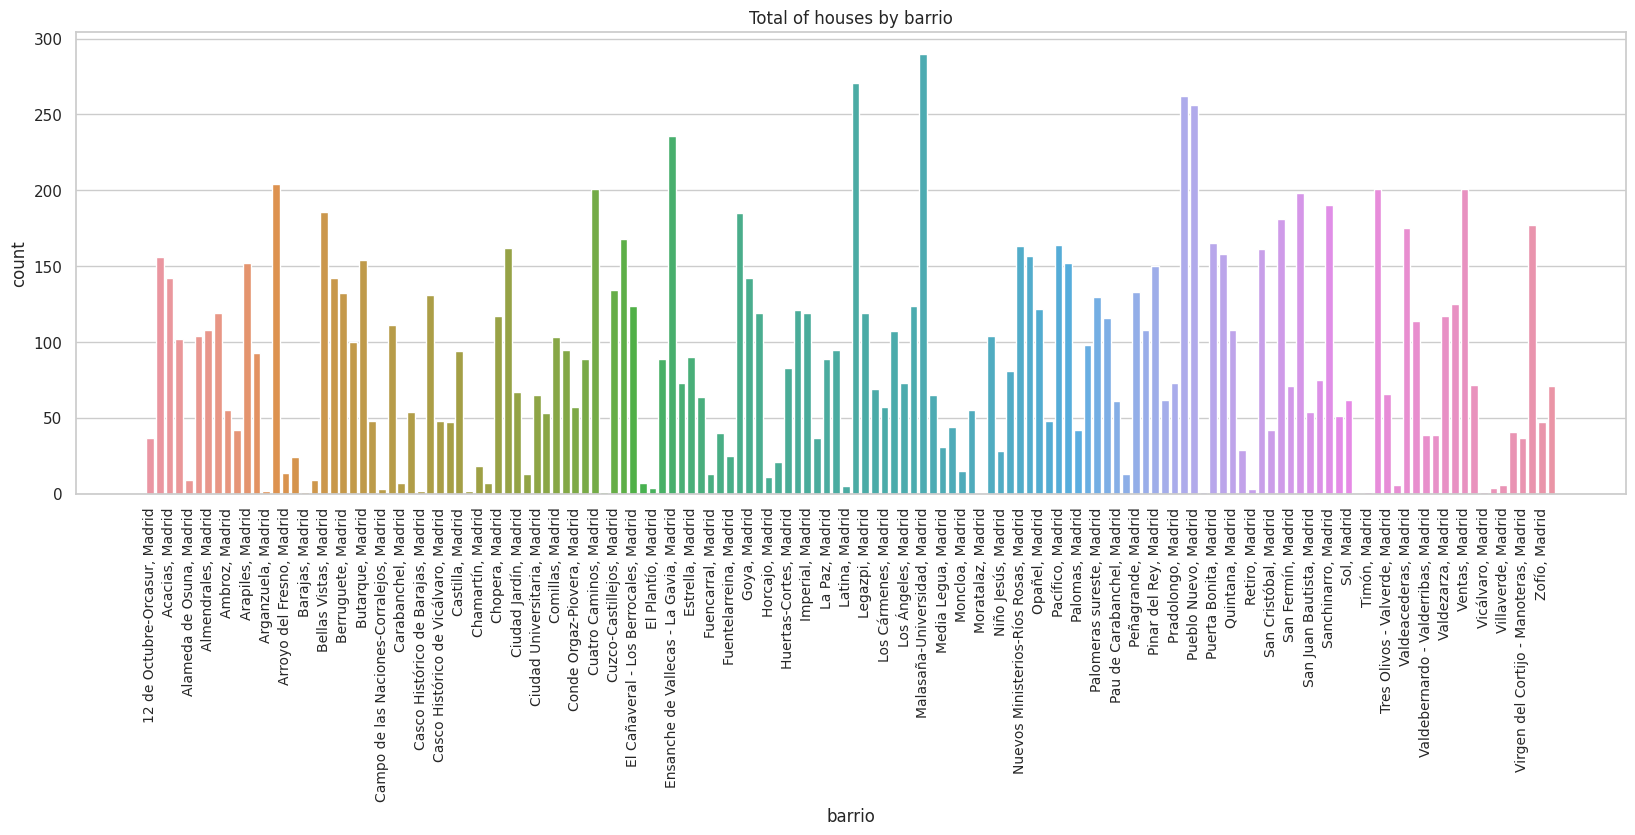

In [180]:
for idx in ["barrio"]:
    df_plot = data.copy()

    df_plot = (data.groupby(idx)[idx].count()
                                    .to_frame()
                                    .rename(columns={idx: "count"})
                                    .reset_index())
    plt.figure(figsize=(20, 6))
    sns.barplot(x=df_plot[idx], y=df_plot["count"])
    plt.title(f"Total of houses by {idx}")
    plt.tick_params(axis='x', labelsize="small", labelrotation=90)
    plt.locator_params(axis='x', nbins=126)
    plt.show()

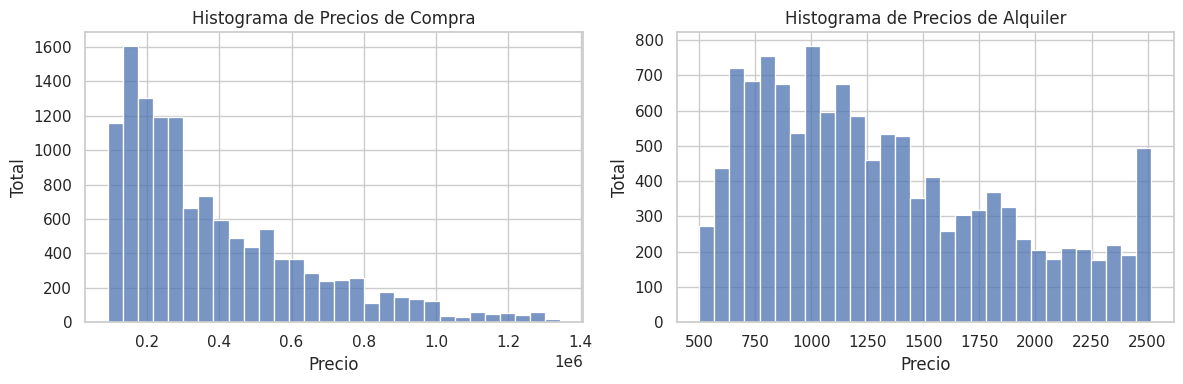

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes dos conjuntos de datos llamados data.buy_price y df.rent_price

# Configura una figura con dos subplots en una fila
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Primer subplot - Histograma de data.buy_price
sns.histplot(data.buy_price, bins=30, ax=ax1)
ax1.set_title('Histograma de Precios de Compra')
ax1.set_ylabel("Total")
ax1.set_xlabel("Precio")

# Segundo subplot - Histograma de df.rent_price
sns.histplot(data.rent_price, bins=30, ax=ax2)
ax2.set_title('Histograma de Precios de Alquiler')
ax2.set_ylabel("Total")
ax2.set_xlabel("Precio")

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Muestra la figura
plt.show()


In [182]:
log_price = np.log1p(df.buy_price)

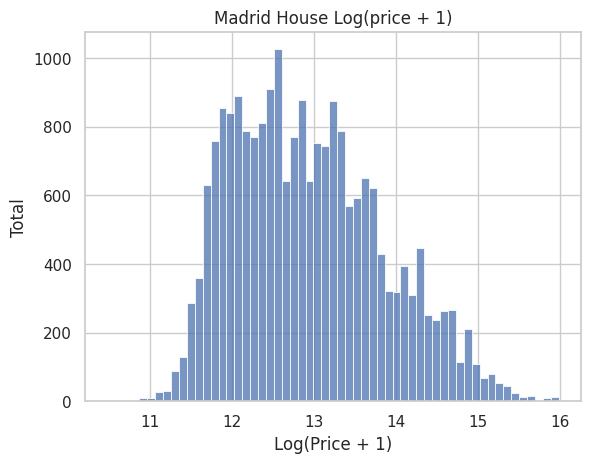

In [183]:
sns.histplot(log_price)
plt.title('Madrid House Log(price + 1)')
plt.ylabel("Total")
plt.xlabel("Log(Price + 1)")
plt.show()

In [184]:
data.head()

,id,barrio,sq_mt_built,n_rooms,n_bathrooms,raw_address,floor,neighborhood_id,rent_price,buy_price,house_type_id,has_lift,is_exterior,distrito
0,21741,"Los Ángeles, Madrid",70.0,3,1.0,Calle de la del Manojo de Rosas,4,132,666,129900,Pisos,True,True,21
1,21740,"San Andrés, Madrid",94.0,2,2.0,"Calle del Talco, 68",1,134,722,144247,Pisos,True,True,21
2,21739,"San Andrés, Madrid",64.0,2,1.0,Calle Pedro Jiménez,Bajo,134,583,109900,Pisos,True,True,21
3,21738,"Los Rosales, Madrid",108.0,2,2.0,Carretera de Villaverde a Vallecas,4,133,1094,260000,Pisos,True,True,21
4,21737,"San Andrés, Madrid",126.0,4,2.0,geologia,3,134,901,195000,Pisos,False,True,21


In [185]:
data.dtypes

id                    int64
barrio             category
sq_mt_built         float64
n_rooms               int64
n_bathrooms         float64
raw_address        category
floor              category
neighborhood_id      object
rent_price            int64
buy_price             int64
house_type_id        object
has_lift           category
is_exterior        category
distrito             object
dtype: object

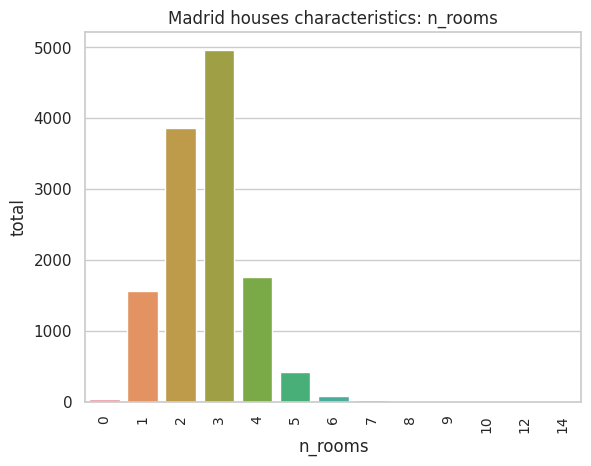

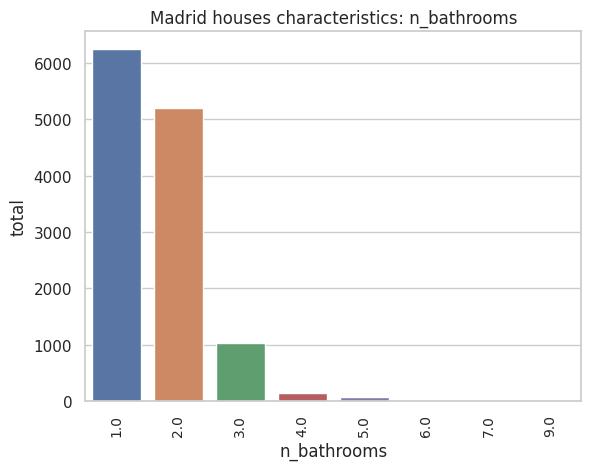

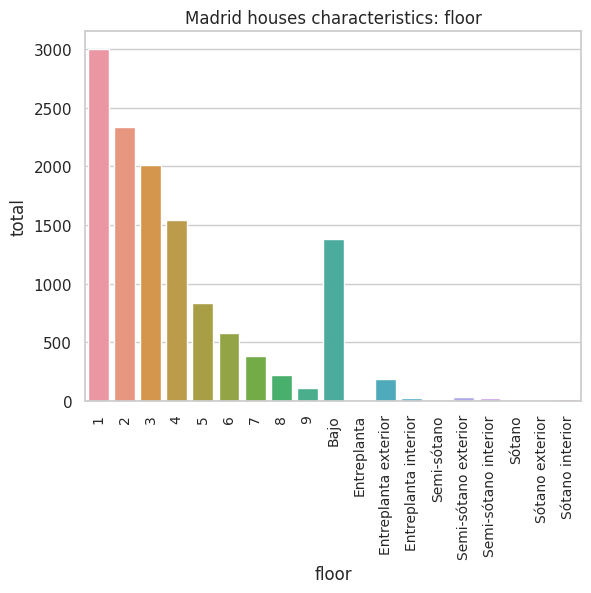

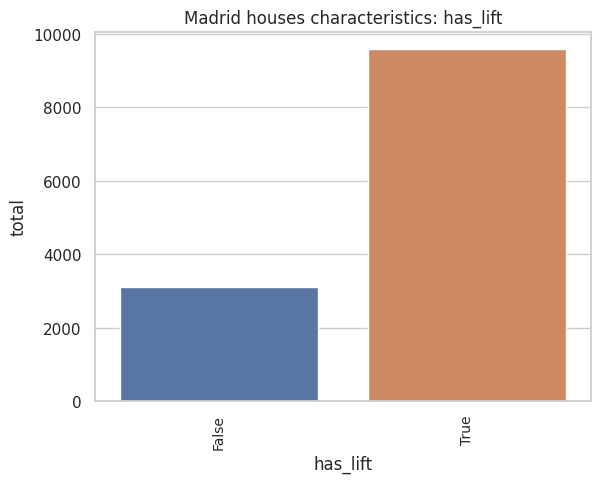

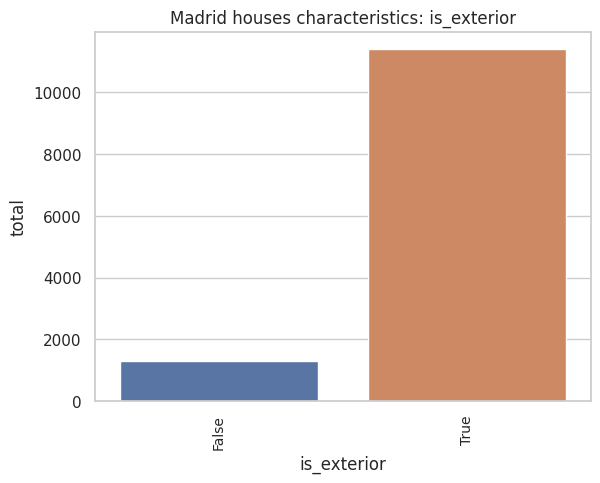

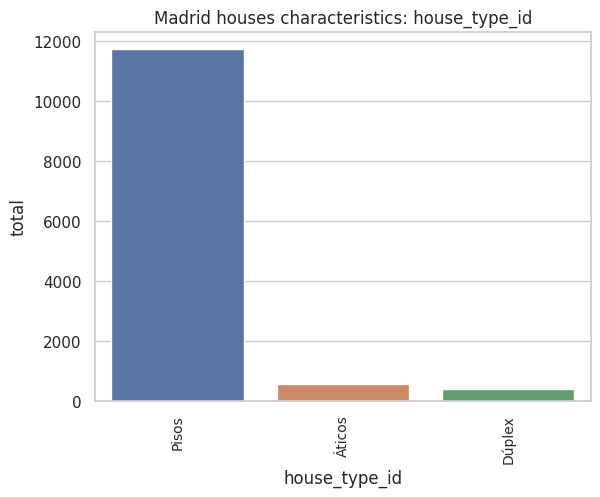

In [186]:
for idx in ["n_rooms", "n_bathrooms", "floor", "has_lift", "is_exterior", "house_type_id"]:
    df_fig = data[idx].value_counts().to_frame().reset_index().rename(columns=({idx:"total","index":idx}))
    sns.barplot(x=df_fig[idx], y=df_fig["total"])
    plt.title(f'Madrid houses characteristics: {idx}')
    plt.tick_params(axis='x', labelsize="small", labelrotation=90)
    plt.show()
    print()
    print()

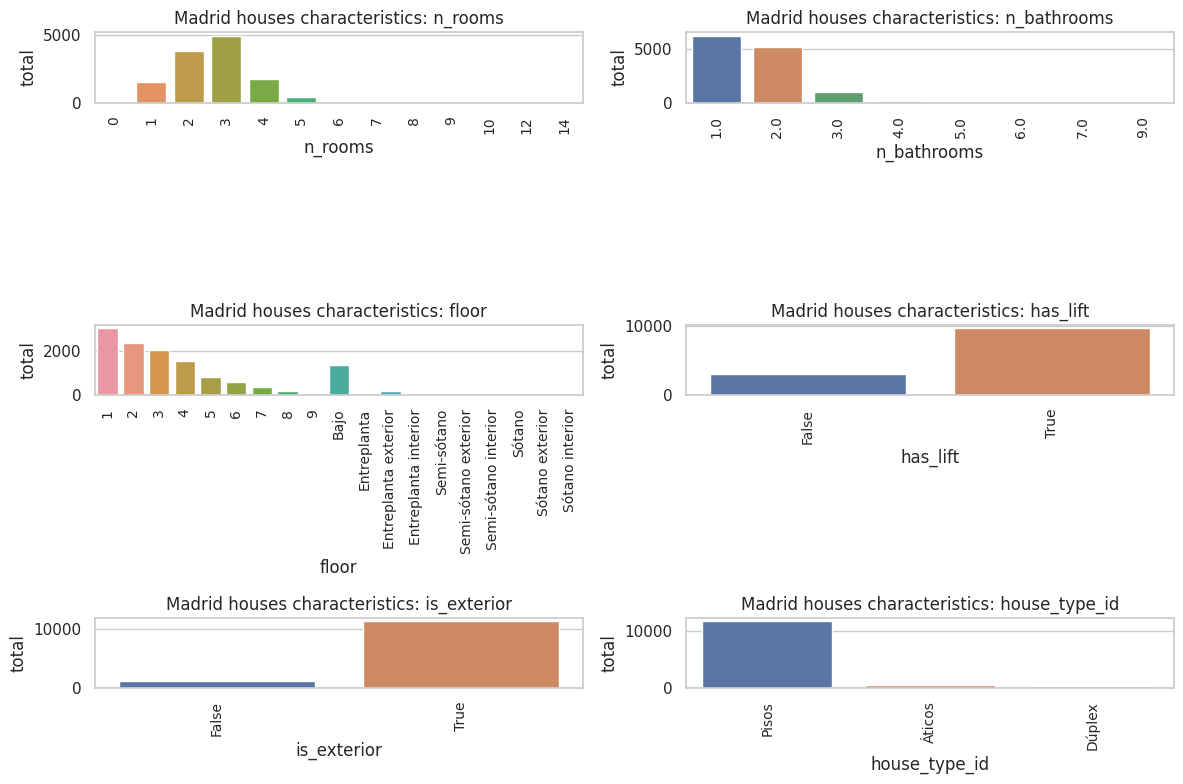

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Variables que deseas visualizar en subplots
variables_a_visualizar = ["n_rooms", "n_bathrooms", "floor", "has_lift", "is_exterior", "house_type_id"]

# Calcula el número de filas y columnas necesarios para los subplots
num_variables = len(variables_a_visualizar)
num_rows = (num_variables + 1) // 2  # 2 subplots por línea
num_cols = 2

# Crea subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Asegúrate de que axes sea una matriz 2D incluso si solo hay una fila o columna
if num_rows == 1:
    axes = axes.reshape(1, -1)
elif num_cols == 1:
    axes = axes.reshape(-1, 1)

# Itera sobre las variables y crea los gráficos de barras en los subplots
for i, var in enumerate(variables_a_visualizar):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Crear el gráfico de barras
    df_fig = data[var].value_counts().to_frame().reset_index().rename(columns={var: "total", "index": var})
    sns.barplot(x=df_fig[var], y=df_fig["total"], ax=ax)

    ax.set_title(f'Madrid houses characteristics: {var}')
    ax.tick_params(axis='x', labelsize="small", labelrotation=90)

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()



In [188]:
data[["distrito", "rent_price"]].groupby("distrito").mean().reset_index().sort_values(by="rent_price", ascending=False)

,distrito,rent_price
16,6,1826.381003
6,15,1801.307692
15,5,1705.808765
5,14,1653.042202
2,11,1627.986464
14,4,1614.187867
19,9,1545.327225
18,8,1531.397535
10,2,1445.625000
0,1,1373.289911


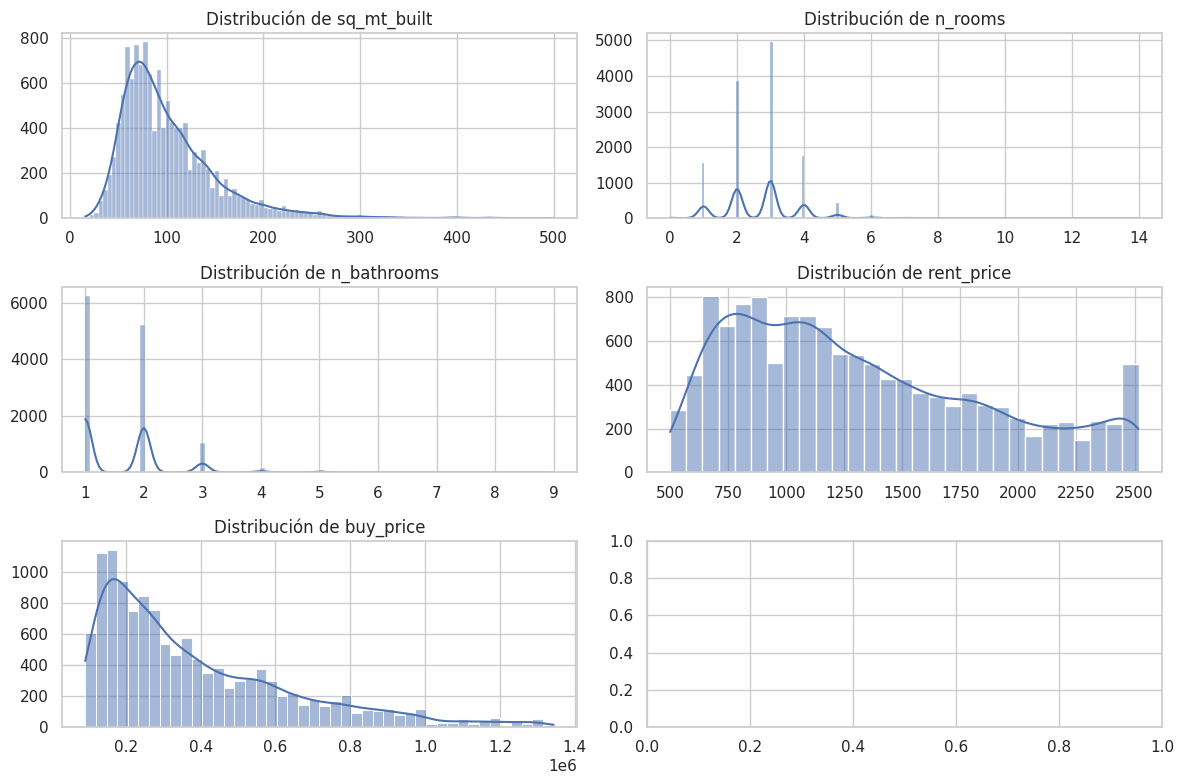

In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variables que deseas visualizar en subplots
variables_a_visualizar = ["sq_mt_built", "n_rooms", "n_bathrooms", "rent_price", "buy_price"]

# Crea un subconjunto de datos solo con las variables que deseas visualizar
data_subset = data[variables_a_visualizar]

# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Calcula el número de filas y columnas necesarios para los subplots
num_variables = len(variables_a_visualizar)
num_rows = (num_variables + 1) // 2  # 2 subplots por línea
num_cols = 2

# Crea subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Asegúrate de que axes sea una matriz 2D incluso si solo hay una fila o columna
if num_rows == 1:
    axes = axes.reshape(1, -1)
elif num_cols == 1:
    axes = axes.reshape(-1, 1)

# Itera sobre las variables y crea las distribuciones en los subplots
for i, var in enumerate(variables_a_visualizar):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Crear la distribución
    sns.histplot(data=data_subset[var], kde=True, ax=ax)

    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Muestra los subplots
plt.show()






In [190]:
data.shape

(12708, 14)

In [191]:
data_2 = data.dropna()

In [192]:
data_2.shape

(12708, 14)

In [193]:
data_2.shape

(12708, 14)

In [194]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Supongamos que tienes un DataFrame llamado 'df' que contiene tus datos.

# Convierte las columnas categóricas en numéricas usando LabelEncoder
label_encoder = LabelEncoder()

data_2['has_lift'] = label_encoder.fit_transform(data_2['has_lift'])


# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = data_2[['n_bathrooms', 'rent_price','n_rooms','sq_mt_built','has_lift']]
y = data_2['buy_price']  # Target variable

# Dividir el conjunto de datos en un train set y un test set (por ejemplo, 80% train y 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ahora, X_train y y_train contienen los datos de entrenamiento,
# mientras que X_test y y_test contienen los datos de prueba.



print(len(X_train), len(X_test), len(y_train), len(y_test))

X_train, X_test, y_train, y_test

10166 2542 10166 2542


(       n_bathrooms  rent_price  n_rooms  sq_mt_built  has_lift
 3006           2.0        1839        3        124.0         1
 2631           2.0        1519        2        120.0         1
 4288           1.0         868        2         60.0         0
 7144           3.0        2035        4        131.0         1
 2963           1.0         802        1         30.0         0
 ...            ...         ...      ...          ...       ...
 11964          1.0        1262        2         79.0         1
 5191           2.0        2232        3        128.0         1
 5390           2.0        1430        2         95.0         1
 860            2.0        1083        4        125.0         1
 7270           1.0         833        1         40.0         1
 
 [10166 rows x 5 columns],
        n_bathrooms  rent_price  n_rooms  sq_mt_built  has_lift
 5098           2.0        1827        4        142.0         1
 11898          1.0        1382        1        110.0         1
 6596      

In [195]:
X_test.columns

Index(['n_bathrooms', 'rent_price', 'n_rooms', 'sq_mt_built', 'has_lift'], dtype='object')

In [196]:
X_train.columns

Index(['n_bathrooms', 'rent_price', 'n_rooms', 'sq_mt_built', 'has_lift'], dtype='object')

In [197]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline

# pipeline
estimator = make_pipeline(StandardScaler(), SGDRegressor())

# entrenamiento del modelo
estimator.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [198]:
from sklearn.linear_model import LinearRegression

# pipeline
estimator2 = make_pipeline(StandardScaler(), LinearRegression())

# entrenamiento del modelo
estimator2.fit(X_train, y_train)
print(estimator2.score(X_test, y_test))

0.8562945848937116


In [199]:
from sklearn.ensemble import RandomForestRegressor

# Crear el pipeline con Random Forest
estimator = make_pipeline(StandardScaler(), RandomForestRegressor())

# Entrenar el modelo
estimator.fit(X_train, y_train)

# Calcular la puntuación R2 en el conjunto de prueba
r2_score = estimator.score(X_test, y_test)
print("R2 Score:", r2_score)


R2 Score: 0.9555761291253703


In [200]:
from sklearn.neural_network import MLPRegressor

# Crear el pipeline con una red neuronal
estimator_nn = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500))

# Entrenar el modelo de red neuronal
estimator_nn.fit(X_train, y_train)

# Calcular la puntuación R2 en el conjunto de prueba
r2_score_nn = estimator_nn.score(X_test, y_test)
print("R2 Score (Neural Network):", r2_score_nn)


R2 Score (Neural Network): 0.8962816152692624


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [201]:
data.head()

,id,barrio,sq_mt_built,n_rooms,n_bathrooms,raw_address,floor,neighborhood_id,rent_price,buy_price,house_type_id,has_lift,is_exterior,distrito
0,21741,"Los Ángeles, Madrid",70.0,3,1.0,Calle de la del Manojo de Rosas,4,132,666,129900,Pisos,True,True,21
1,21740,"San Andrés, Madrid",94.0,2,2.0,"Calle del Talco, 68",1,134,722,144247,Pisos,True,True,21
2,21739,"San Andrés, Madrid",64.0,2,1.0,Calle Pedro Jiménez,Bajo,134,583,109900,Pisos,True,True,21
3,21738,"Los Rosales, Madrid",108.0,2,2.0,Carretera de Villaverde a Vallecas,4,133,1094,260000,Pisos,True,True,21
4,21737,"San Andrés, Madrid",126.0,4,2.0,geologia,3,134,901,195000,Pisos,False,True,21


In [202]:
#seleccion variables
variables = data_2.drop(["buy_price"], axis=1, inplace=False)
variables = data_2.drop(["id"], axis=1, inplace=False)
targets = data_2["buy_price"]
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2 = SelectKBest(chi2, k=6).fit(variables._get_numeric_data(), targets)
for (col, sel) in zip(variables._get_numeric_data().columns.values, chi2.get_support()):
    if sel:
        print(col)
seleccion = chi2.transform(variables._get_numeric_data())

sq_mt_built
n_rooms
n_bathrooms
rent_price
buy_price
has_lift


In [203]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

f_classif = SelectKBest(f_classif, k=6).fit(variables._get_numeric_data(), targets)
for (col, sel) in zip(variables._get_numeric_data().columns.values, f_classif.get_support()):
    if sel:
        print(col)
seleccion = f_classif.transform(variables._get_numeric_data())

sq_mt_built
n_rooms
n_bathrooms
rent_price
buy_price
has_lift


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [204]:
data_2.head()

,id,barrio,sq_mt_built,n_rooms,n_bathrooms,raw_address,floor,neighborhood_id,rent_price,buy_price,house_type_id,has_lift,is_exterior,distrito
0,21741,"Los Ángeles, Madrid",70.0,3,1.0,Calle de la del Manojo de Rosas,4,132,666,129900,Pisos,1,True,21
1,21740,"San Andrés, Madrid",94.0,2,2.0,"Calle del Talco, 68",1,134,722,144247,Pisos,1,True,21
2,21739,"San Andrés, Madrid",64.0,2,1.0,Calle Pedro Jiménez,Bajo,134,583,109900,Pisos,1,True,21
3,21738,"Los Rosales, Madrid",108.0,2,2.0,Carretera de Villaverde a Vallecas,4,133,1094,260000,Pisos,1,True,21
4,21737,"San Andrés, Madrid",126.0,4,2.0,geologia,3,134,901,195000,Pisos,0,True,21


In [205]:
data_2['ingreso_bruto'] = data_2['rent_price'] * 12

In [206]:
data_2['ingreso_neto'] = (data_2['rent_price']-data_2['rent_price']*0.2)*12

In [207]:
data_2['rentabilidad_bruta'] = data_2['ingreso_bruto']/data_2['buy_price']

In [208]:
data_2['rentabilidad_neta']= data_2['ingreso_neto']/data_2['buy_price']

In [209]:
data_2['tiempo_recuperación'] = data_2['buy_price']/data_2['ingreso_bruto']

In [210]:
data_2['tiempo_recuperación_neto'] = data_2['buy_price']/data_2['ingreso_neto']

In [211]:
data_2['aporte_inicial'] = 0.2*data_2['buy_price'] + 0.03*data_2['buy_price'] + 0.07*data_2['buy_price']

In [212]:
data_2['tiempo_recuperacion_real'] = (data_2['buy_price']-data_2['aporte_inicial'])/data_2['ingreso_neto']

In [213]:
data_2.head()

,id,barrio,sq_mt_built,n_rooms,n_bathrooms,raw_address,floor,neighborhood_id,rent_price,buy_price,...,is_exterior,distrito,ingreso_bruto,ingreso_neto,rentabilidad_bruta,rentabilidad_neta,tiempo_recuperación,tiempo_recuperación_neto,aporte_inicial,tiempo_recuperacion_real
0,21741,"Los Ángeles, Madrid",70.0,3,1.0,Calle de la del Manojo de Rosas,4,132,666,129900,...,True,21,7992,6393.6,0.061524,0.049219,16.253754,20.317192,38970.0,14.222035
1,21740,"San Andrés, Madrid",94.0,2,2.0,"Calle del Talco, 68",1,134,722,144247,...,True,21,8664,6931.2,0.060064,0.048051,16.649007,20.811259,43274.1,14.567881
2,21739,"San Andrés, Madrid",64.0,2,1.0,Calle Pedro Jiménez,Bajo,134,583,109900,...,True,21,6996,5596.8,0.063658,0.050926,15.708977,19.636221,32970.0,13.745354
3,21738,"Los Rosales, Madrid",108.0,2,2.0,Carretera de Villaverde a Vallecas,4,133,1094,260000,...,True,21,13128,10502.4,0.050492,0.040394,19.804997,24.756246,78000.0,17.329372
4,21737,"San Andrés, Madrid",126.0,4,2.0,geologia,3,134,901,195000,...,True,21,10812,8649.6,0.055446,0.044357,18.035516,22.544395,58500.0,15.781077


In [214]:
data_2.drop(['tiempo_recuperacion_real'], axis=1)

,id,barrio,sq_mt_built,n_rooms,n_bathrooms,raw_address,floor,neighborhood_id,rent_price,buy_price,...,has_lift,is_exterior,distrito,ingreso_bruto,ingreso_neto,rentabilidad_bruta,rentabilidad_neta,tiempo_recuperación,tiempo_recuperación_neto,aporte_inicial
0,21741,"Los Ángeles, Madrid",70.0,3,1.0,Calle de la del Manojo de Rosas,4,132,666,129900,...,1,True,21,7992,6393.6,0.061524,0.049219,16.253754,20.317192,38970.0
1,21740,"San Andrés, Madrid",94.0,2,2.0,"Calle del Talco, 68",1,134,722,144247,...,1,True,21,8664,6931.2,0.060064,0.048051,16.649007,20.811259,43274.1
2,21739,"San Andrés, Madrid",64.0,2,1.0,Calle Pedro Jiménez,Bajo,134,583,109900,...,1,True,21,6996,5596.8,0.063658,0.050926,15.708977,19.636221,32970.0
3,21738,"Los Rosales, Madrid",108.0,2,2.0,Carretera de Villaverde a Vallecas,4,133,1094,260000,...,1,True,21,13128,10502.4,0.050492,0.040394,19.804997,24.756246,78000.0
4,21737,"San Andrés, Madrid",126.0,4,2.0,geologia,3,134,901,195000,...,0,True,21,10812,8649.6,0.055446,0.044357,18.035516,22.544395,58500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,10,"Casco Histórico de Barajas, Madrid",74.0,2,1.0,Calle Júpiter,Entreplanta exterior,10,1037,239500,...,1,True,2,12444,9955.2,0.051958,0.041567,19.246223,24.057779,71850.0
12704,8,"Alameda de Osuna, Madrid",89.0,3,1.0,Calle Galeón,5,8,1135,275000,...,1,True,2,13620,10896.0,0.049527,0.039622,20.190896,25.238620,82500.0
12705,7,"Campo de las Naciones-Corralejos, Madrid",88.0,2,2.0,Calle Bahía de Almería,1,9,1346,360000,...,1,True,2,16152,12921.6,0.044867,0.035893,22.288262,27.860327,108000.0
12706,6,"Campo de las Naciones-Corralejos, Madrid",99.0,2,2.0,Calle Bahía de Alicante,1,9,1320,349000,...,1,True,2,15840,12672.0,0.045387,0.036309,22.032828,27.541035,104700.0


In [220]:
# Filtrar pisos con precio de compra entre 200,000 y 300,000
# y tiempo de recuperación menor que 18
data_3 = (data_2['buy_price'] >= 200000) & (data_2['buy_price'] <= 300000) & (data_2['tiempo_recuperación'] < 22)
pisos_filtrados = data_2[filtro]

data_3.head()

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [221]:
data_2.head()

,id,barrio,sq_mt_built,n_rooms,n_bathrooms,raw_address,floor,neighborhood_id,rent_price,buy_price,...,is_exterior,distrito,ingreso_bruto,ingreso_neto,rentabilidad_bruta,rentabilidad_neta,tiempo_recuperación,tiempo_recuperación_neto,aporte_inicial,tiempo_recuperacion_real
0,21741,"Los Ángeles, Madrid",70.0,3,1.0,Calle de la del Manojo de Rosas,4,132,666,129900,...,True,21,7992,6393.6,0.061524,0.049219,16.253754,20.317192,38970.0,14.222035
1,21740,"San Andrés, Madrid",94.0,2,2.0,"Calle del Talco, 68",1,134,722,144247,...,True,21,8664,6931.2,0.060064,0.048051,16.649007,20.811259,43274.1,14.567881
2,21739,"San Andrés, Madrid",64.0,2,1.0,Calle Pedro Jiménez,Bajo,134,583,109900,...,True,21,6996,5596.8,0.063658,0.050926,15.708977,19.636221,32970.0,13.745354
3,21738,"Los Rosales, Madrid",108.0,2,2.0,Carretera de Villaverde a Vallecas,4,133,1094,260000,...,True,21,13128,10502.4,0.050492,0.040394,19.804997,24.756246,78000.0,17.329372
4,21737,"San Andrés, Madrid",126.0,4,2.0,geologia,3,134,901,195000,...,True,21,10812,8649.6,0.055446,0.044357,18.035516,22.544395,58500.0,15.781077


In [226]:
# Filtrar pisos con precio de compra entre 200,000 y 300,000 y tiempo de recuperación menor que 18
filtro = (data_2['buy_price'] >= 200000) & (data_2['buy_price'] <= 300000) & (data_2['tiempo_recuperación'] < 22)
pisos_filtrados = data_2[filtro]

# Mostrar las primeras filas de los resultados
pisos_filtrados.head()


,id,barrio,sq_mt_built,n_rooms,n_bathrooms,raw_address,floor,neighborhood_id,rent_price,buy_price,...,is_exterior,distrito,ingreso_bruto,ingreso_neto,rentabilidad_bruta,rentabilidad_neta,tiempo_recuperación,tiempo_recuperación_neto,aporte_inicial,tiempo_recuperacion_real
3,21738,"Los Rosales, Madrid",108.0,2,2.0,Carretera de Villaverde a Vallecas,4,133,1094,260000,...,True,21,13128,10502.4,0.050492,0.040394,19.804997,24.756246,78000.0,17.329372
9,21729,"Los Ángeles, Madrid",109.0,3,2.0,"Calle de Anoeta, 63",3,132,933,205000,...,True,21,11196,8956.8,0.054615,0.043692,18.310111,22.887638,61500.0,16.021347
14,21711,"Los Rosales, Madrid",123.0,3,2.0,Carretera de Villaverde a Vallecas,7,133,1195,298000,...,True,21,14340,11472.0,0.048121,0.038497,20.781032,25.976290,89400.0,18.183403
18,21702,"Butarque, Madrid",125.0,3,3.0,Calle ESTEFANITA,7,131,1135,275000,...,True,21,13620,10896.0,0.049527,0.039622,20.190896,25.238620,82500.0,17.667034
19,21700,"Butarque, Madrid",97.0,2,2.0,"Calle Arroyo de la Bulera, 31",Bajo,131,1111,266122,...,True,21,13332,10665.6,0.050097,0.040078,19.961146,24.951433,79836.6,17.466003


In [215]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.neural_network import MLPRegressor

# Definir los posibles valores de los hiperparámetros para búsqueda en cuadrícula
#param_grid = {
#    'mlpregressor__hidden_layer_sizes': [(50,), (100,), (50, 20), (100, 50)],
#    'mlpregressor__activation': ['relu', 'tanh', 'sigmoid'],
#    'mlpregressor__alpha': [0.0001, 0.001, 0.01]
#}

# Construir el pipeline
#estimator_3 = make_pipeline(StandardScaler(), MLPRegressor())

# Realizar búsqueda en cuadrícula para encontrar los mejores hiperparámetros
#grid_search = GridSearchCV(estimator_3, param_grid, cv=5)
#grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y su score en el conjunto de prueba
#best_estimator = grid_search.best_estimator_
#score = best_estimator.score(X_test, y_test)

# Imprimir los resultados
#print("Mejor score encontrado:", score)
#print("Mejores hiperparámetros encontrados:")
#print(grid_search.best_params_)